## Problem Statement :

BACKGROUND A company has a fleet of devices transmitting daily
sensor readings. They would like to create a predictive maintenance
solution to proactively identify when maintenance should be
performed. This approach promises cost savings over routine or timebased preventive maintenance, because tasks are performed only when
warranted.

GOAL You are tasked with building a predictive model using machine
learning to predict the probability of a device failure. When building
this model, be sure to minimize false positives and false negatives. The
column you are trying to Predict is called failure with binary value 0 for
non-failure and 1 for failure. 

In [ ]:
!pip install imbalanced-learn

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
#Reading the dataset into a dataframe from a CSV file
df=pd.read_csv("predictive_maintainece_dataset.csv")
df.head(20)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,1/1/2015,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,1/1/2015,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,1/1/2015,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,1/1/2015,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,1/1/2015,S1F02DZ2,0,116440096,0,378,9,9,407905,0,0,170


In [ ]:
df.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/2015,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,70000


In [ ]:
#checking for any missing values in the dataframe
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [ ]:
df['device'].value_counts()

device
Z1F0QL3N    304
W1F0SJJ2    304
S1F0EGMT    304
S1F0FGBQ    304
S1F0FP0C    304
           ... 
S1F0CSRZ      5
S1F0CT09      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: count, Length: 1169, dtype: int64

In [ ]:
#cheking for the number of unique devices in the dataset.
df['device'].nunique()

1169

In [ ]:
#Checking if there are any instances of failure i.e. 1 in the dataset.
df[df['failure']==1]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
4885,1/5/2015,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,1/7/2015,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,1/9/2015,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,1/13/2015,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,1/14/2015,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
109927,8/4/2015,W1F1CB5E,1,16043296,88,0,0,9,30,0,0,0
114251,8/18/2015,Z1F0MRPJ,1,65654088,0,0,0,9,298592,0,0,11
122118,10/5/2015,S1F0JGJV,1,13739704,0,0,18,8,343760,0,0,0
122808,10/9/2015,Z1F14BGY,1,85259320,0,0,164,8,262932,0,0,0


In [ ]:
aggregated = df.groupby('device')['failure'].agg(['min', 'max'])
aggregated

,min,max
device,,
S1F01085,0,0
S1F013BB,0,0
S1F0166B,0,0
S1F01E6Y,0,0
S1F01JE0,0,0
...,...,...
Z1F1VMZB,0,0
Z1F1VQFY,0,1
Z1F26YZB,0,0


In [ ]:
#checking for devices which has both failure and non-failure instances
devices_with_both = aggregated[(aggregated['min'] == 0) & (aggregated['max'] == 1)].index
pd.Series(devices_with_both)

0      S1F023H2
1      S1F03YZM
2      S1F09DZQ
3      S1F0CTDN
4      S1F0DSTY
         ...   
101    Z1F1901P
102    Z1F1AG5N
103    Z1F1FCH5
104    Z1F1RJFA
105    Z1F1VQFY
Name: device, Length: 106, dtype: object

In [ ]:
# Filter the DataFrame for devices with both failure and non-failure instances
filtered_df = df[df['device'].isin(devices_with_both)]

# Grouping by device and failure columns , then counting the frequency of failure and non-failure of each device
frequency = filtered_df.groupby(['device', 'failure']).size().reset_index(name='frequency')
pd.crosstab(index=frequency['device'],columns=frequency['failure'],values=frequency['frequency'],aggfunc='sum')


failure,0,1
device,,
S1F023H2,18,1
S1F03YZM,214,1
S1F09DZQ,198,1
S1F0CTDN,6,1
S1F0DSTY,44,1
...,...,...
Z1F1901P,131,1
Z1F1AG5N,8,1
Z1F1FCH5,18,1


In [ ]:
#checking for the total number of instances of failure and non-failure in the dataset.
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

### Seeing the above results we can conclude that there is a problem of class imbalance in this dataset , which might create a problem as the model may become biased towards the majority class during training.

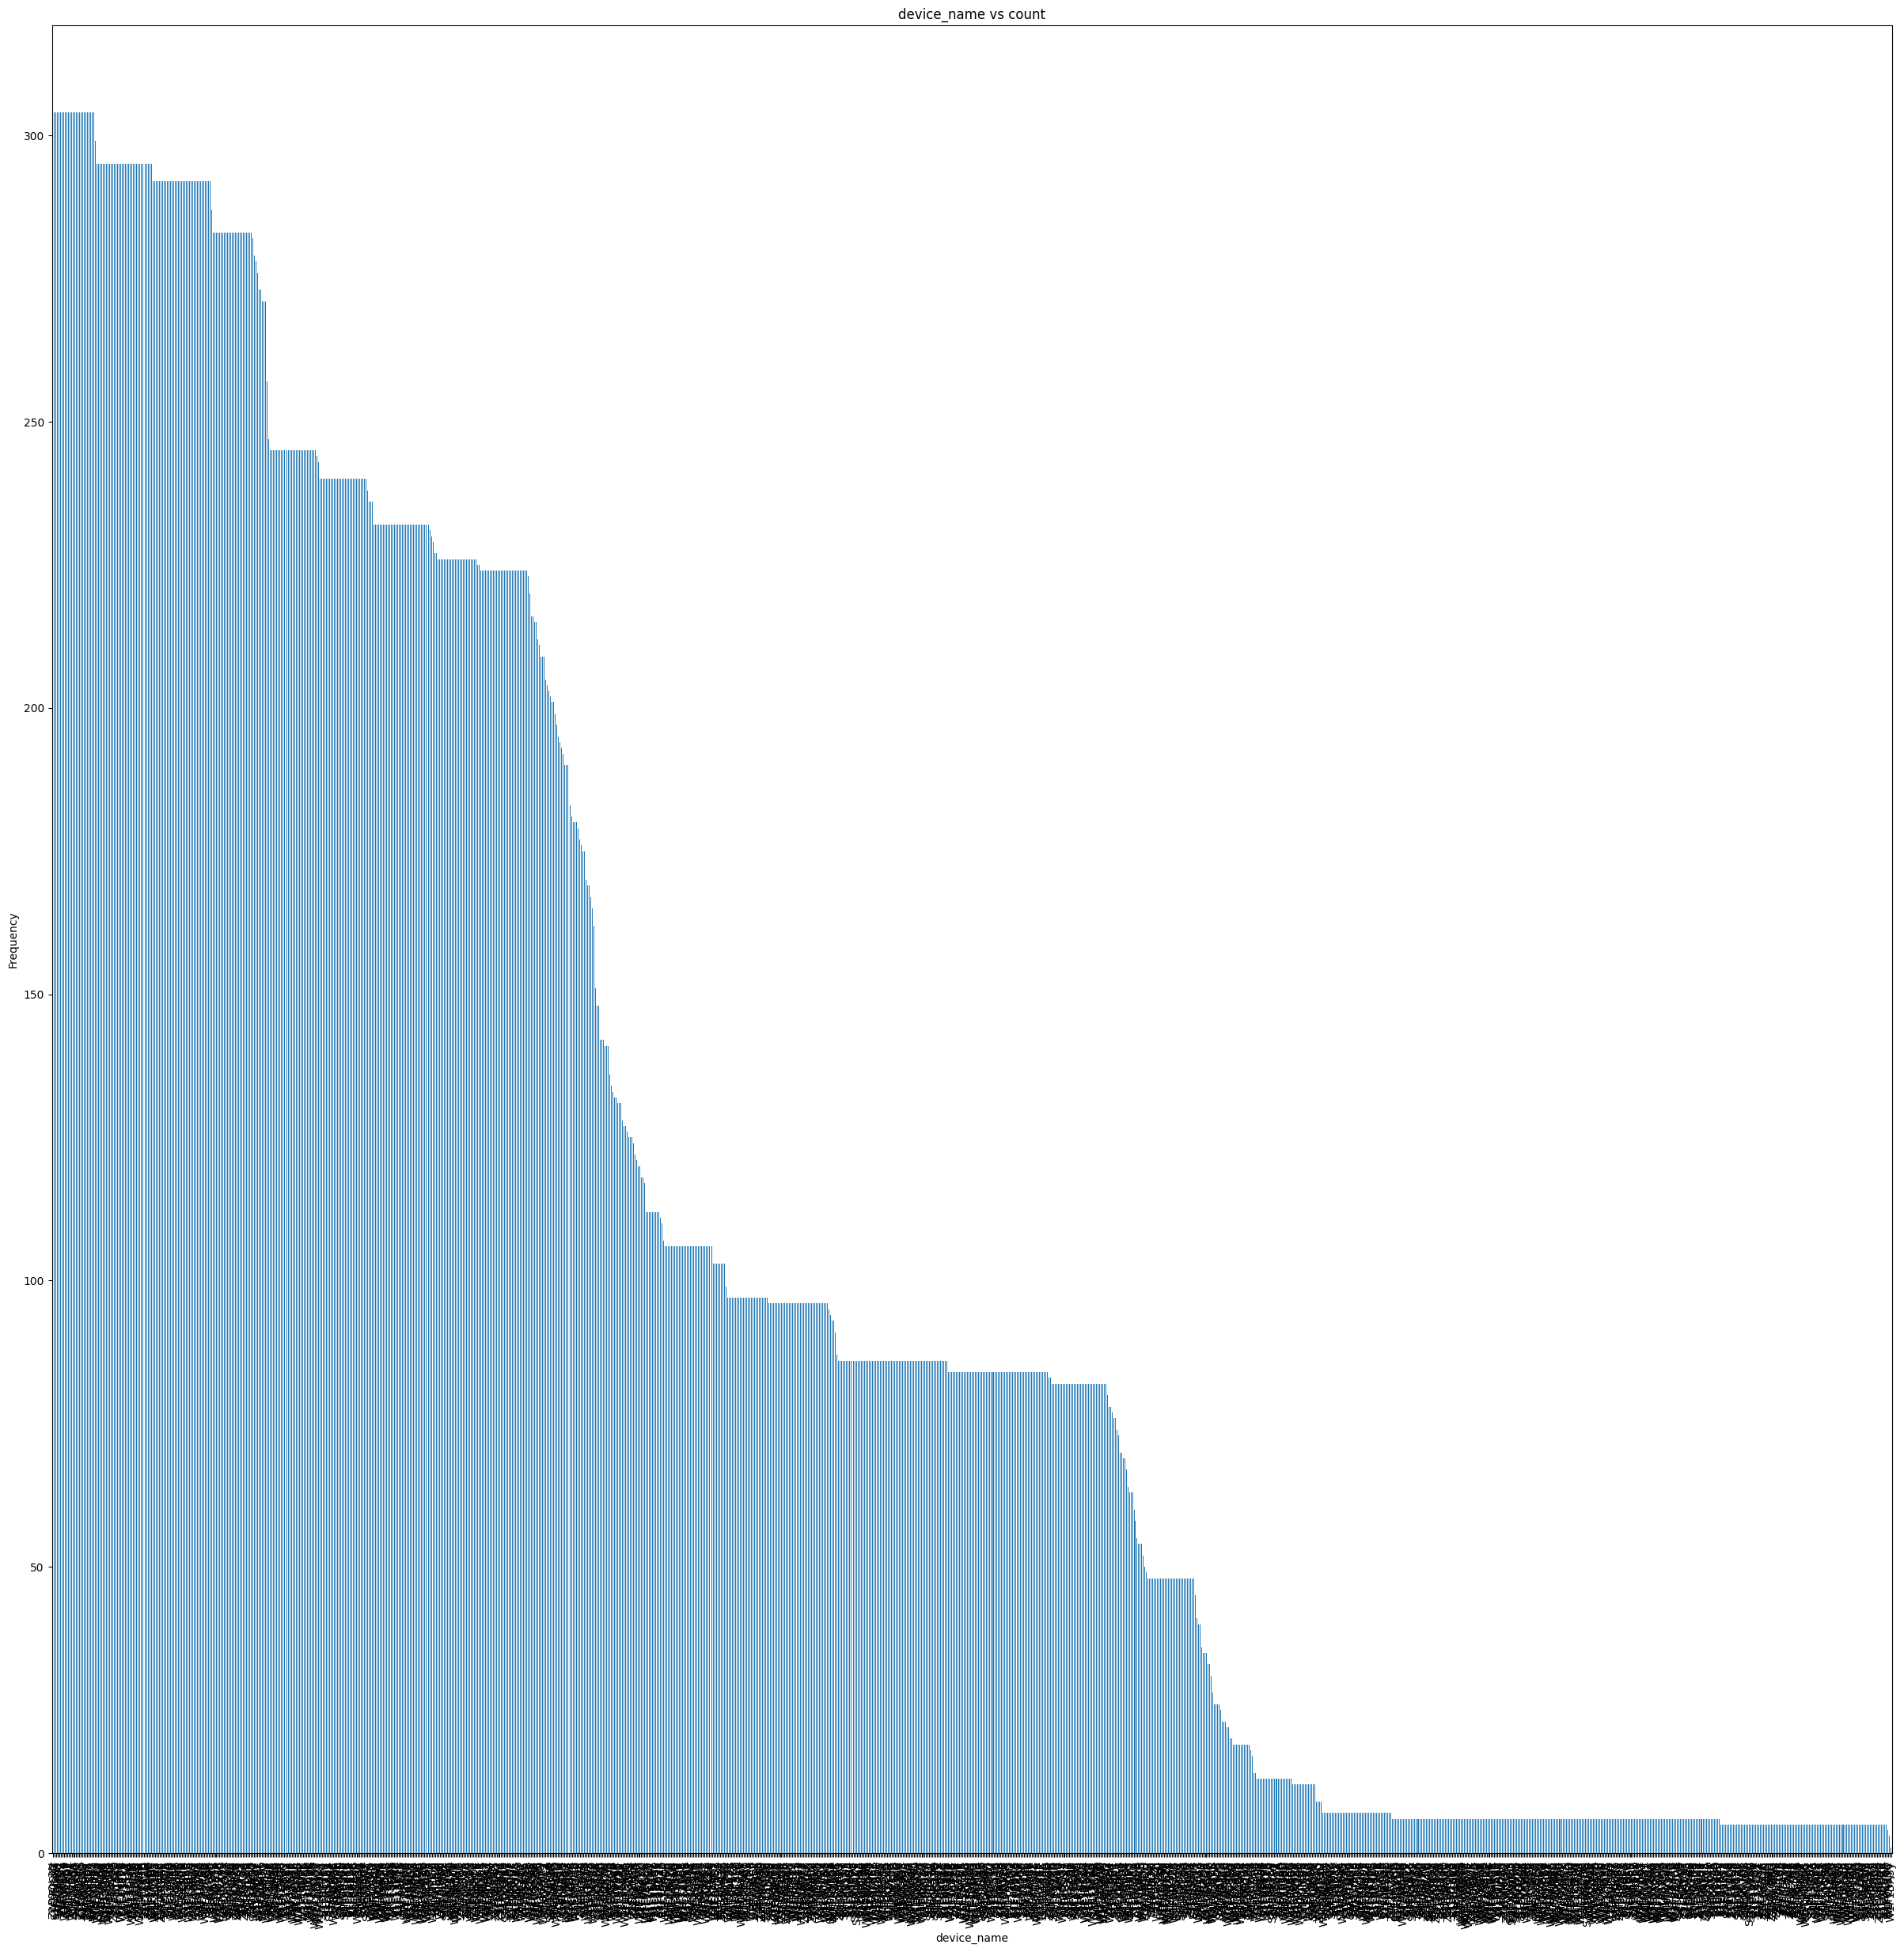

In [ ]:
#Creating a bar-plot of the count of each device present in the dataset.
plt.figure(figsize=(30,30))
df['device'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('device_name')
plt.ylabel('Frequency')
plt.title('device_name vs count')
plt.show()

In [ ]:
#total length of the dataset.
len(df)

124494

In [ ]:
#converting the date column from type object to type datetime.
df.date=pd.to_datetime(df['date'])

In [ ]:
df.dtypes

date       datetime64[ns]
device             object
failure             int64
metric1             int64
metric2             int64
metric3             int64
metric4             int64
metric5             int64
metric6             int64
metric7             int64
metric8             int64
metric9             int64
dtype: object

In [ ]:
df.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

In [ ]:
#Checking for the timeframe within which the data was captured.
print(df['date'].max())
print(df['date'].min())

2015-11-02 00:00:00
2015-01-01 00:00:00


In [3]:
#Creating a seperate dataframe with the independent features .
df_x=df[['device','metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9']]

In [ ]:
df_x.head(30)

,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,S1F01085,215630672,55,0,52,6,407438,0,0,7
1,S1F0166B,61370680,0,3,0,6,403174,0,0,0
2,S1F01E6Y,173295968,0,0,0,12,237394,0,0,0
3,S1F01JE0,79694024,0,0,0,6,410186,0,0,0
4,S1F01R2B,135970480,0,0,0,15,313173,0,0,3
5,S1F01TD5,68837488,0,0,41,6,413535,0,0,1
6,S1F01XDJ,227721632,0,0,0,8,402525,0,0,0
7,S1F023H2,141503600,0,0,1,19,494462,16,16,3
8,S1F02A0J,8217840,0,1,0,14,311869,0,0,0
9,S1F02DZ2,116440096,0,378,9,9,407905,0,0,170


In [ ]:
df_x.columns

Index(['device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

In [ ]:
#Taking all the columns except the device column from df_x dataframe and creating a seperate dataframe.
df_x_subset=df_x[['metric1', 'metric2', 'metric3', 'metric4', 'metric5',
                   'metric6', 'metric7', 'metric8', 'metric9']]

array([[<Axes: title={'center': 'metric1'}>,
        <Axes: title={'center': 'metric2'}>,
        <Axes: title={'center': 'metric3'}>],
       [<Axes: title={'center': 'metric4'}>,
        <Axes: title={'center': 'metric5'}>,
        <Axes: title={'center': 'metric6'}>],
       [<Axes: title={'center': 'metric7'}>,
        <Axes: title={'center': 'metric8'}>,
        <Axes: title={'center': 'metric9'}>]], dtype=object)

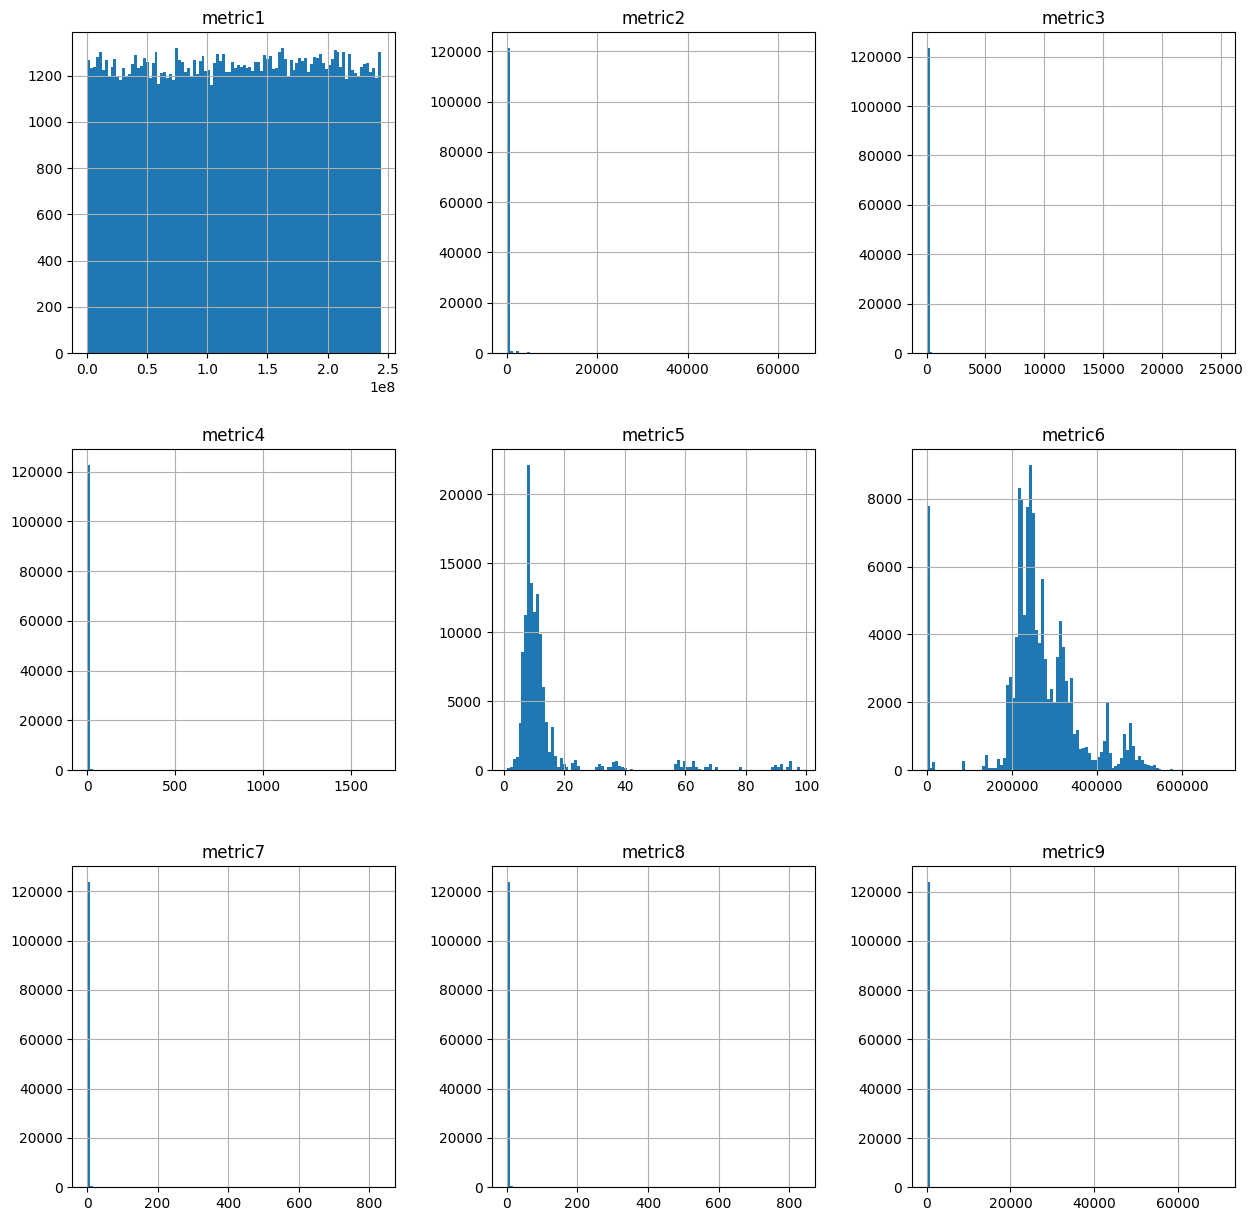

In [ ]:
#Checking the distribution of each of the numerical features in the dataset.
#fig, axis = plt.subplots(9, 9)
df_x_subset.hist(bins=100,figsize=(15,15))

### Upon checking the distribution of each numerical feature in the dataset we find that almost all are heavily skewed in nature.

In [ ]:
#Implementing the process of normalizing the numerical features in the dataset in order to bring them to a single scale.

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_x_subset_scaled=scaler.fit_transform(df_x_subset)
print(type(df_x_subset_scaled))
df_x_subset_scaled=pd.DataFrame(df_x_subset_scaled)
df_x_subset_scaled.head(20)

<class 'numpy.ndarray'>


,0,1,2,3,4,5,6,7,8
0,0.883224,0.000847,0.000000,0.031212,0.051546,0.591204,0.000000,0.000000,0.000100
1,0.251374,0.000000,0.000120,0.000000,0.051546,0.585017,0.000000,0.000000,0.000000
2,0.709821,0.000000,0.000000,0.000000,0.113402,0.344461,0.000000,0.000000,0.000000
3,0.326427,0.000000,0.000000,0.000000,0.051546,0.595191,0.000000,0.000000,0.000000
4,0.556935,0.000000,0.000000,0.000000,0.144330,0.454420,0.000000,0.000000,0.000043
5,0.281959,0.000000,0.000000,0.024610,0.051546,0.600051,0.000000,0.000000,0.000014
6,0.932748,0.000000,0.000000,0.000000,0.072165,0.584075,0.000000,0.000000,0.000000
7,0.579599,0.000000,0.000000,0.000600,0.185567,0.717481,0.019231,0.019231,0.000043
8,0.033660,0.000000,0.000040,0.000000,0.134021,0.452528,0.000000,0.000000,0.000000
9,0.476939,0.000000,0.015163,0.005402,0.082474,0.591882,0.000000,0.000000,0.002429


In [ ]:
#Reassigning the column names.
df_x_subset_scaled.columns=df_x_subset.columns

In [ ]:
df_x_subset_scaled.head(10)

,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,0.883224,0.000847,0.000000,0.031212,0.051546,0.591204,0.000000,0.000000,0.000100
1,0.251374,0.000000,0.000120,0.000000,0.051546,0.585017,0.000000,0.000000,0.000000
2,0.709821,0.000000,0.000000,0.000000,0.113402,0.344461,0.000000,0.000000,0.000000
3,0.326427,0.000000,0.000000,0.000000,0.051546,0.595191,0.000000,0.000000,0.000000
4,0.556935,0.000000,0.000000,0.000000,0.144330,0.454420,0.000000,0.000000,0.000043
5,0.281959,0.000000,0.000000,0.024610,0.051546,0.600051,0.000000,0.000000,0.000014
6,0.932748,0.000000,0.000000,0.000000,0.072165,0.584075,0.000000,0.000000,0.000000
7,0.579599,0.000000,0.000000,0.000600,0.185567,0.717481,0.019231,0.019231,0.000043
8,0.033660,0.000000,0.000040,0.000000,0.134021,0.452528,0.000000,0.000000,0.000000
9,0.476939,0.000000,0.015163,0.005402,0.082474,0.591882,0.000000,0.000000,0.002429


In [ ]:
#Encoding the device feature in the dataset using Label Encoding.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_x['device'] = le.fit_transform(df_x['device'])
print(type(df_x['device']))
df_x['device'].head()

<class 'pandas.core.series.Series'>


<ipython-input-27-faf144be2b3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['device'] = le.fit_transform(df_x['device'])


0    0
1    2
2    3
3    4
4    5
Name: device, dtype: int64

### The reason I didn't use one-hot encoding to encode the device column in this case, is because here the number of samples in the dataset is huge and doing one-hot encoding would only increase the dimentionality of the dataset massively , creating a very sparse matrix .

<Axes: >

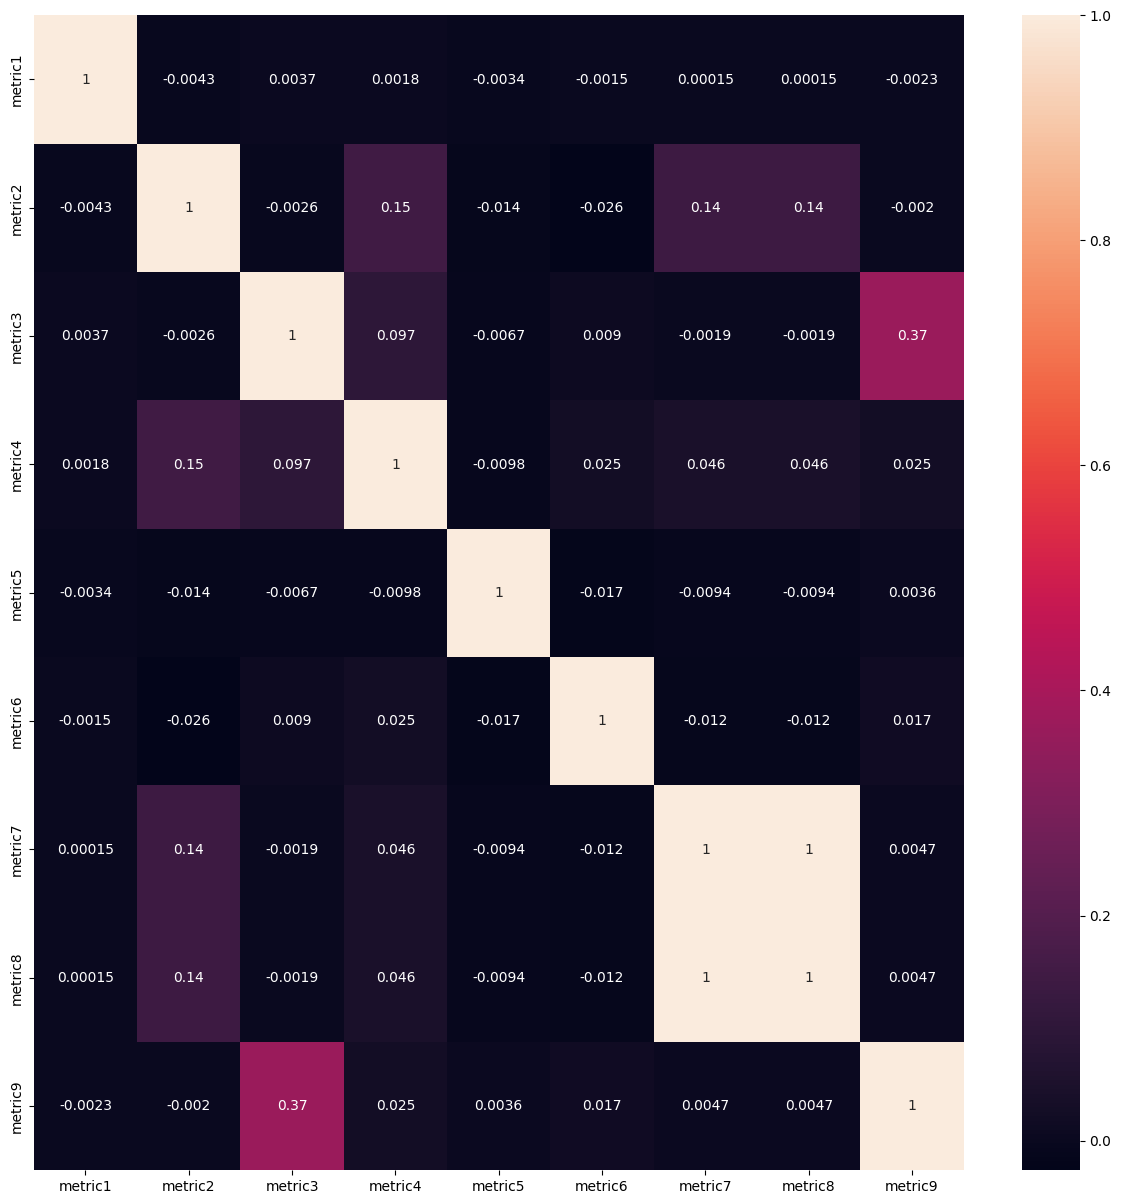

In [ ]:
#Checking for Multi-collinearity in the dataset.
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df_x_subset_scaled.corr(),annot=True)

In [ ]:
df_x_subset_scaled.columns

Index(['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6',
       'metric7', 'metric8', 'metric9'],
      dtype='object')

### We need to eliminate one among the metric8 or metric7 as both are highly correlated with each other , so one needs to be dropped .Among the metric8 and metric7 , we drop metric8 because we see that it is showing less variance and would not affect the model as much as metric7.Hence I decide to drop metric8.

In [ ]:
#Dropping metric8 from the dataset.
df_x_subset_scaled=df_x_subset_scaled[['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6',
                                       'metric7', 'metric9']]

<Axes: >

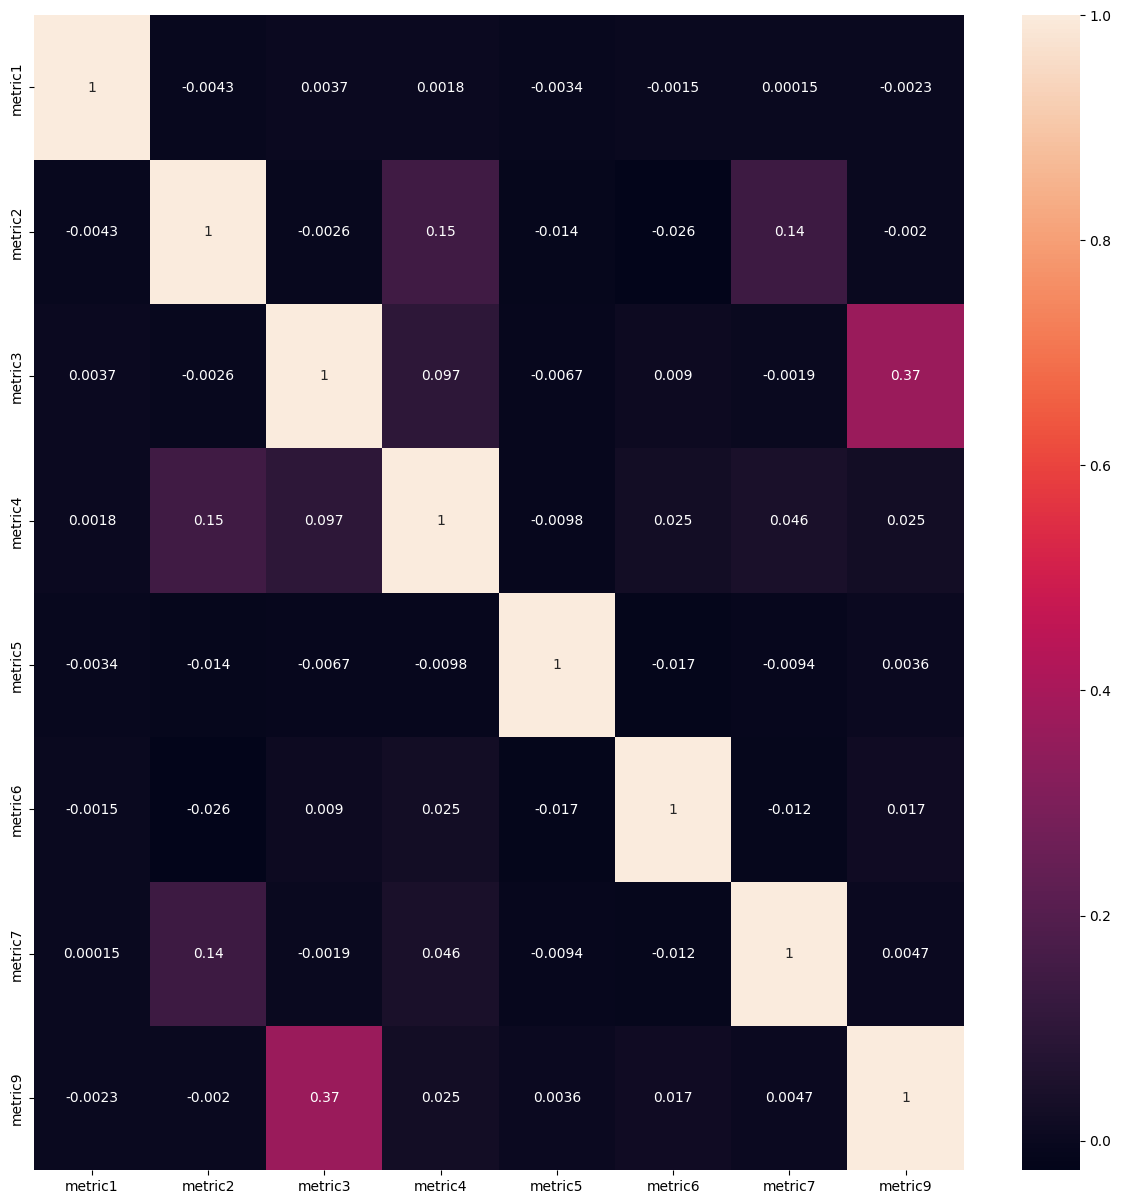

In [ ]:
#Verifying the case of multi-collinearity again using a heatmap.
plt.figure(figsize=(15,15))
sns.heatmap(df_x_subset_scaled.corr(),annot=True)

In [ ]:
len(df_x)

124494

In [ ]:
df_x_deviceonly=df_x['device']
df_x_deviceonly

0            0
1            2
2            3
3            4
4            5
          ... 
124489    1045
124490    1068
124491    1075
124492    1081
124493    1082
Name: device, Length: 124494, dtype: int64

In [ ]:
len(df_x_subset_scaled)

124494

In [ ]:
df_x_deviceonly = df_x_deviceonly.reset_index(drop=True)
df_x_subset_scaled = df_x_subset_scaled.reset_index(drop=True)
df_x_subset_scaled.head()


,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,0.883224,0.000847,0.00000,0.031212,0.051546,0.591204,0.0,0.000100
1,0.251374,0.000000,0.00012,0.000000,0.051546,0.585017,0.0,0.000000
2,0.709821,0.000000,0.00000,0.000000,0.113402,0.344461,0.0,0.000000
3,0.326427,0.000000,0.00000,0.000000,0.051546,0.595191,0.0,0.000000
4,0.556935,0.000000,0.00000,0.000000,0.144330,0.454420,0.0,0.000043


In [ ]:
#Merging the two datasets - df_x_deviceonly and df_x_subset_scaled based on their indexes .
merged_df = pd.merge(df_x_deviceonly, df_x_subset_scaled, left_index=True, right_index=True)
print(len(merged_df))
merged_df.head(20)

124494


,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9
0,0,0.883224,0.000847,0.000000,0.031212,0.051546,0.591204,0.000000,0.000100
1,2,0.251374,0.000000,0.000120,0.000000,0.051546,0.585017,0.000000,0.000000
2,3,0.709821,0.000000,0.000000,0.000000,0.113402,0.344461,0.000000,0.000000
3,4,0.326427,0.000000,0.000000,0.000000,0.051546,0.595191,0.000000,0.000000
4,5,0.556935,0.000000,0.000000,0.000000,0.144330,0.454420,0.000000,0.000043
5,6,0.281959,0.000000,0.000000,0.024610,0.051546,0.600051,0.000000,0.000014
6,7,0.932748,0.000000,0.000000,0.000000,0.072165,0.584075,0.000000,0.000000
7,8,0.579599,0.000000,0.000000,0.000600,0.185567,0.717481,0.019231,0.000043
8,9,0.033660,0.000000,0.000040,0.000000,0.134021,0.452528,0.000000,0.000000
9,10,0.476939,0.000000,0.015163,0.005402,0.082474,0.591882,0.000000,0.002429


In [ ]:
#Creating the dependent variable.
y = df['failure']

### Implementing the process of splitting the dataset into train set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(merged_df, y, test_size=0.3, random_state=42, stratify=y)

print("----------------Checking the shape of the datasets-------------------------------------")
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

----------------Checking the shape of the datasets-------------------------------------
(87145, 9)
(37349, 9)
(87145,)
(37349,)


### As stated above , to handle the problem of class imbalance efficiently , implementing SMOTE here .

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

counter=Counter(y_train)
print('Before',counter)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
counter=Counter(y_train_resampled)
print('After',counter)

Before Counter({0: 87071, 1: 74})
After Counter({0: 87071, 1: 87071})


### Implementing Random Forest algorithm here for classification.
### The reason I chose Random forests model is because it deals with the problem of overfitting efficiently .

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Initializing the random forest model.
rf_model = RandomForestClassifier(random_state=42,n_estimators=100)

# Training the model on the resampled training data
rf_model.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

### Assesing the importance of each feature in the training set.

metric4    0.278787
metric2    0.277881
metric7    0.202706
device     0.065364
metric5    0.060247
metric6    0.048754
metric9    0.032293
metric1    0.024714
metric3    0.009254
dtype: float64


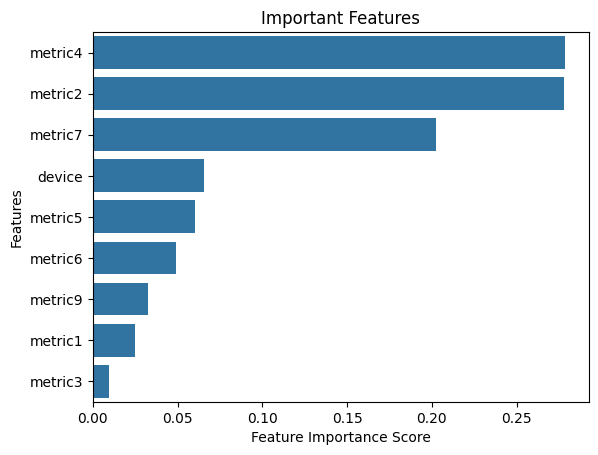

In [ ]:
feature_imp = pd.Series(rf_model.feature_importances_,index=x_train_resampled.columns).sort_values(ascending=False)
print(feature_imp)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

### Making Predictions on the test set.

In [ ]:
# Making predictions on the test data
y_pred = rf_model.predict(x_test)
print(y_pred[:10])
y_prob = rf_model.predict_proba(x_test)
print(y_prob[:10])

[0 0 0 0 0 0 0 0 0 0]
[[1.00000000e+00 0.00000000e+00]
 [9.99737222e-01 2.62777559e-04]
 [9.99247487e-01 7.52513395e-04]
 [1.00000000e+00 0.00000000e+00]
 [9.98984709e-01 1.01529095e-03]
 [9.86592593e-01 1.34074074e-02]
 [9.99247487e-01 7.52513395e-04]
 [9.98984709e-01 1.01529095e-03]
 [9.99247487e-01 7.52513395e-04]
 [9.98984709e-01 1.01529095e-03]]


### Evaluating the results

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.24      0.16      0.19        32

    accuracy                           1.00     37349
   macro avg       0.62      0.58      0.59     37349
weighted avg       1.00      1.00      1.00     37349

Accuracy: 0.9988486974216177
Confusion Matrix:
[[37301    16]
 [   27     5]]


### Implementing hyper-parameter tuning using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 20)), 'max_features': ['sqrt']}]
grid_search = GridSearchCV(rfc, forest_params, cv = 10, scoring='f1',return_train_score=True)
grid_search.fit(x_train_resampled, y_train_resampled)

print(grid_search.best_params_)

{'max_depth': 19, 'max_features': 'sqrt'}


In [ ]:
#Creating the best model object using the optimal hyperparameters
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_depth=19)

In [ ]:
#making predictions using the best_model
y_predictions = best_model.predict(x_test)


In [ ]:
#Evaluating the best model

from sklearn.metrics import classification_report, confusion_matrix

#Classification report
print("Classification Report:")
print(classification_report(y_test, y_predictions))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37317
           1       0.15      0.09      0.12        32

    accuracy                           1.00     37349
   macro avg       0.57      0.55      0.56     37349
weighted avg       1.00      1.00      1.00     37349

Accuracy: 0.9988486974216177
Confusion Matrix:
[[37300    17]
 [   29     3]]


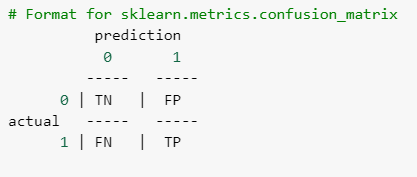






### 1.   I tried to implementing Hyperparameter tuning using GridSearchCV to fine-tune the model in order to further reduce the Type I  and Type II errors . But we observe that in this case it has not improved the performance of the model on key metrics like precision, recall, and F1-score but it gets slightly decreased .

### 2.   The default model performed better in terms of precision, recall, and F1-score before hyper-parameter tuning was done.

### 3.   Given these results, there is no need to implement hyperparameter tuning using GridSearchCV for this particular problem .